In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

# load the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")


In [2]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
import seaborn as sns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df['stroke'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='stroke', ylabel='count'>

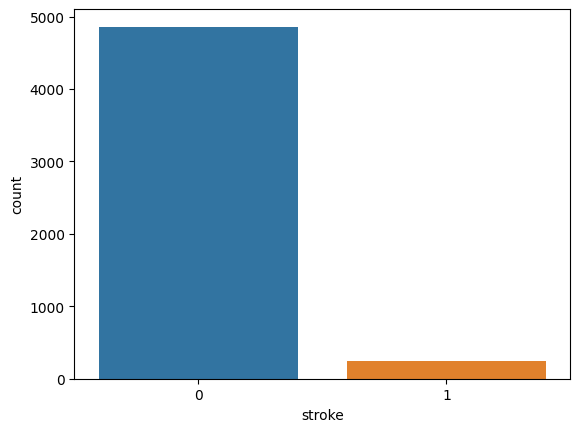

In [6]:
import seaborn as sns
sns.countplot(x=df['stroke'])

### Interpretation of Results:

The target variable '**stroke**' is highly imbalanced with a lot more instances of class **0** (no stroke) than class **1** (stroke). This is an important observation as it will affect the choice of machine learning model and evaluation metric.

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
num_data=['age','avg_glucose_level','bmi']

In [9]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
cat_data=['hypertension','gender','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']

In [11]:
cat_data

['hypertension',
 'gender',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [12]:
import matplotlib.pyplot as plt


In [13]:
for i in df.columns:
  print(i,df[i].nunique())

id 5110
gender 3
age 104
hypertension 2
heart_disease 2
ever_married 2
work_type 5
Residence_type 2
avg_glucose_level 3979
bmi 418
smoking_status 4
stroke 2


for the exploratory data analysis (EDA) we will do following
1. **univariate analysis**: inspect each variable individually to understand its distribution and potential outliers
2. **bi variate analysis** : explore the relationship between each variable with target variable stroke

### Univariate analysis

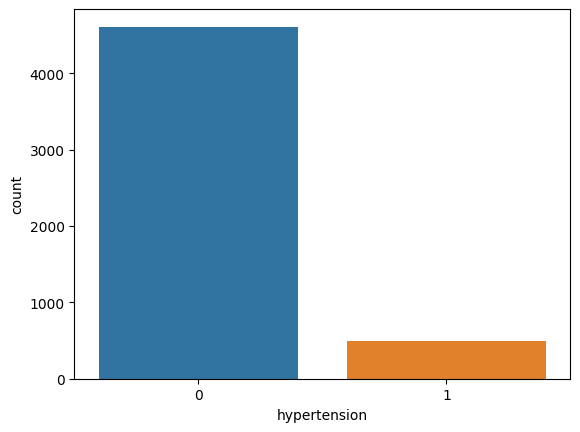

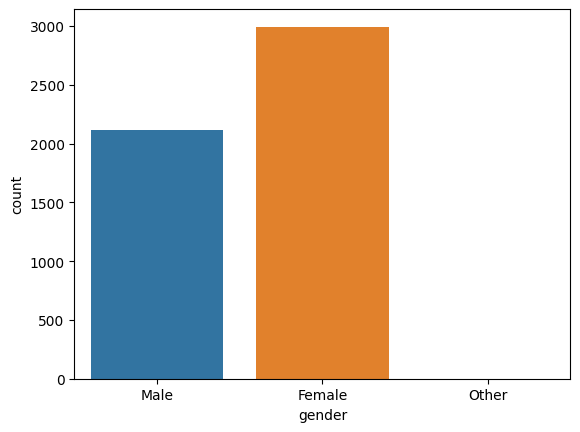

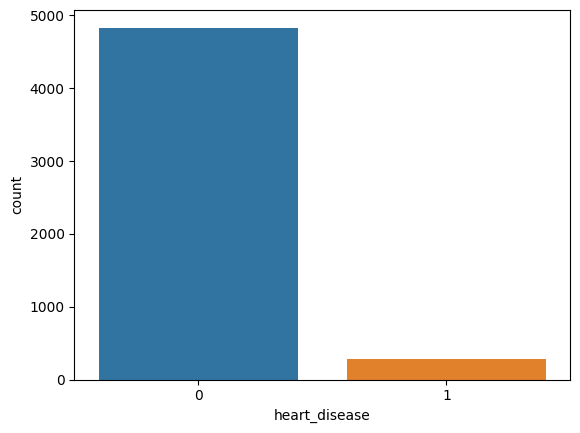

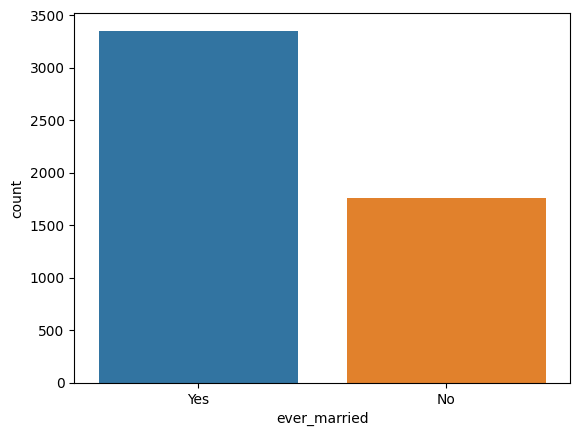

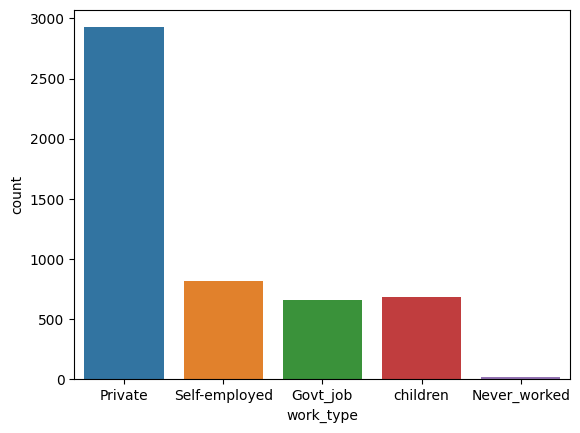

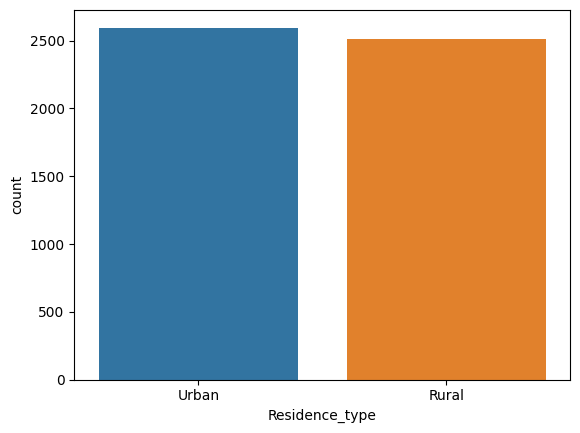

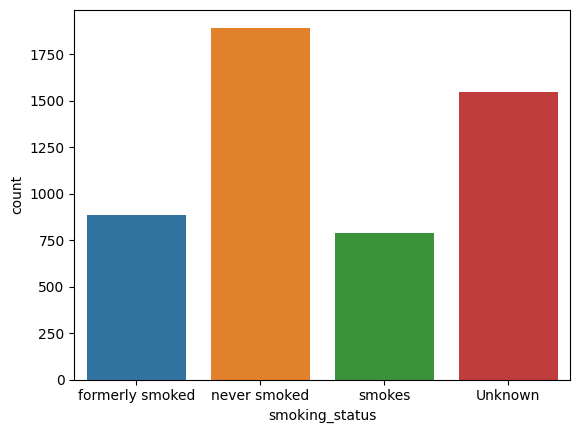

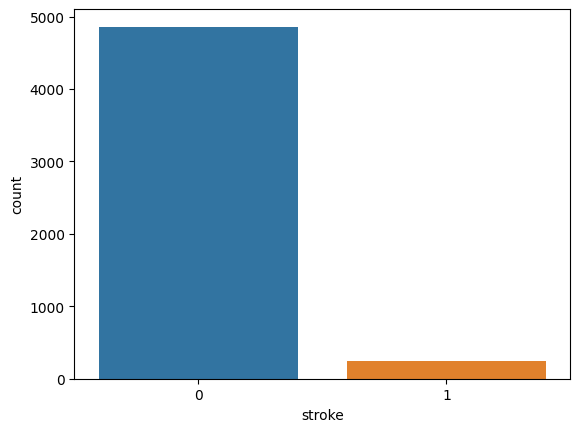

In [14]:
for i in cat_data:
  sns.countplot(x=i,data=df)
  plt.show()

###  Interpretation of Results:

Here are the key observations from the distribution of categorical variables:

- **gender**: There are more `female` than `male` patients, and a very small number of patients identify as `Other`.

- **hypertension**: The majority of patients do not have `hypertension`.

- **heart_disease**: The majority of patients do not have `heart disease`.

- **ever_married**: Most of the patients have been `married at least once`.

- **work_type**: Most of the patients are in the `Private` work category. There are also significant numbers in `Self-employed` and `children`. The categories `Govt_job` and `Never_worked` have fewer patients.

- **Residence_type**: The number of patients living in `urban` and `rural areas` is almost equal.

- **smoking_status**: Most of the patients have `never smoked`. The categories `formerly smoked` and `smokes` have fewer patients. There's a significant portion of patients with `Unknown` smoking status.


Next, let's look at the distribution of the continuous variables: **age**, **avg_glucose_level**, and **bmi**. We'll use histograms and boxplots for this.

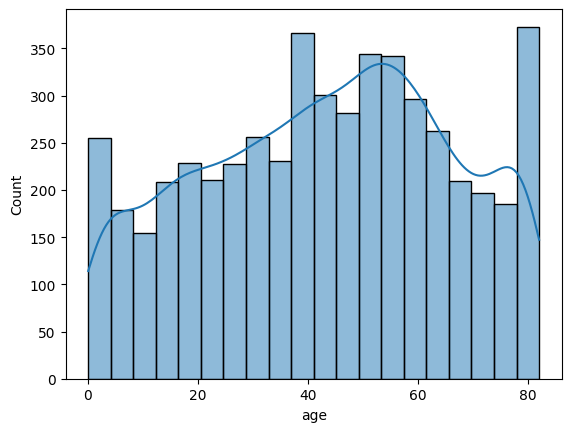

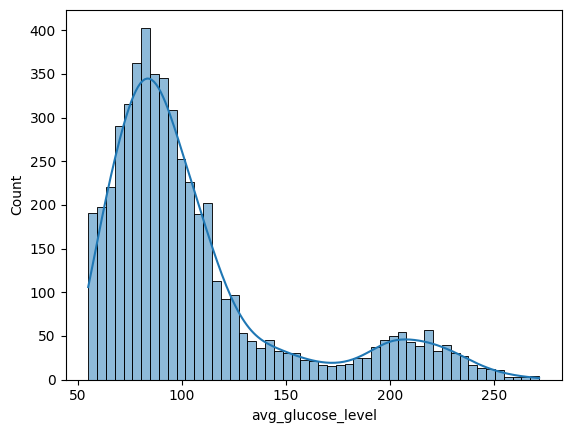

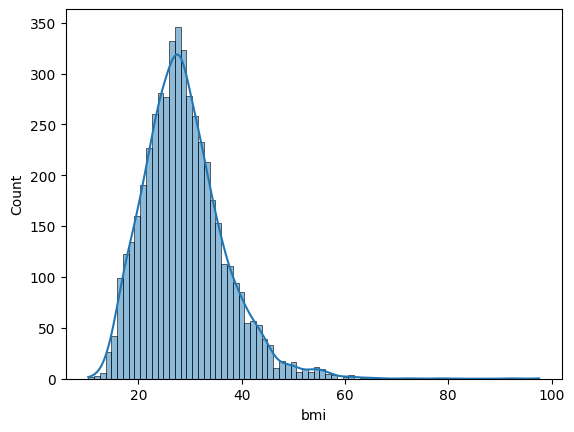

In [15]:
for i in num_data:
  sns.histplot(x=i,data=df,kde=True)
  plt.show()

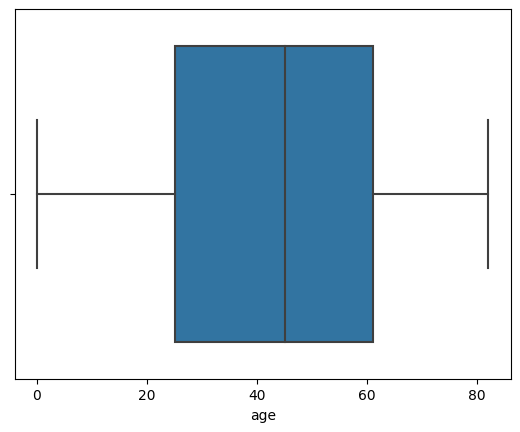

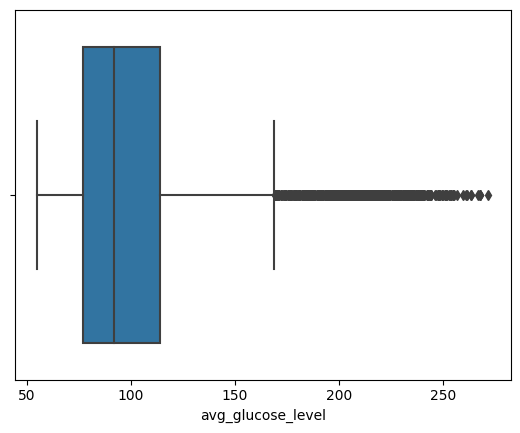

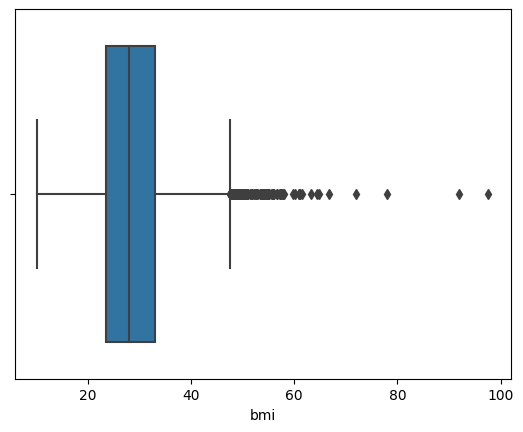

In [16]:
for i in num_data:
  sns.boxplot(x=i,data=df)
  plt.show()

###  Interpretation of Results:

Here are the key observations from the distribution of continuous variables:

- **age**: The age of the patients varies from young to old, with the majority of patients being in the range of **40-70 years**.

- **avg_glucose_level**: Most patients have an average glucose level in the range of **50-125**, but there are also many patients with higher levels. The distribution is right-skewed.

- **bmi**: The majority of patients have a BMI in the range of **20-40**, which is considered normal to overweight. There are some outliers with extremely high BMI values.


Now bivariate analysis. This involves looking at the relationship between the target variable stroke and each of the other variables. For the categorical variables, we'll use count plots split by the target variable. For the continuous variables, we'll use box plots split by the target variable. Let's start with the categorical variables.

### Bivariate analysis

<Axes: xlabel='stroke', ylabel='bmi'>

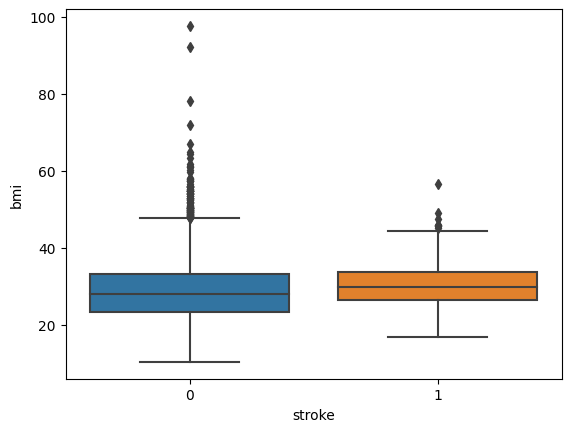

In [17]:
sns.boxplot(x='stroke',y='bmi',data=df)

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

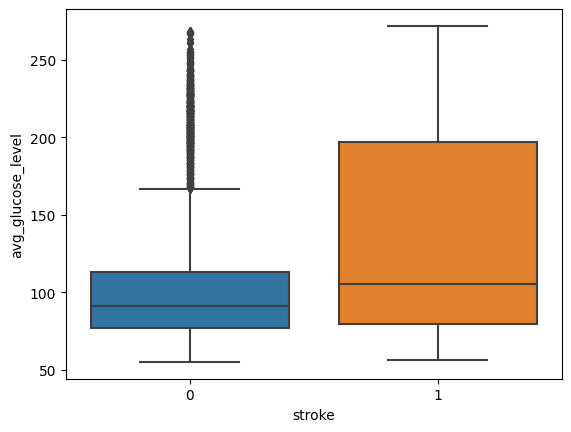

In [18]:
sns.boxplot(x='stroke',y='avg_glucose_level',data=df)

<Axes: xlabel='stroke', ylabel='age'>

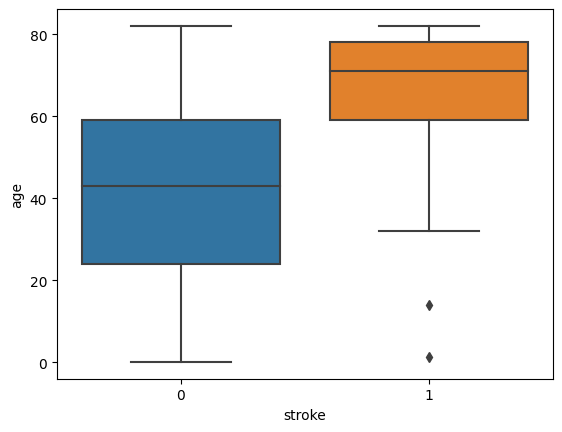

In [19]:
sns.boxplot(x='stroke',y='age',data=df)

### Interpretation of Results:

Observations from the bivariate analysis with the continuous variables:

- **age**: Stroke cases are more common in older patients. The median age of stroke patients appears to be higher than that of non-stroke patients.

- **avg_glucose_level**: Stroke patients seem to have a higher average glucose level than non-stroke patients. There is a wider distribution of glucose levels among stroke patients.

- **bmi**: The BMI distributions for stroke and non-stroke patients are quite similar, suggesting that BMI might not be a strong predictor for stroke.

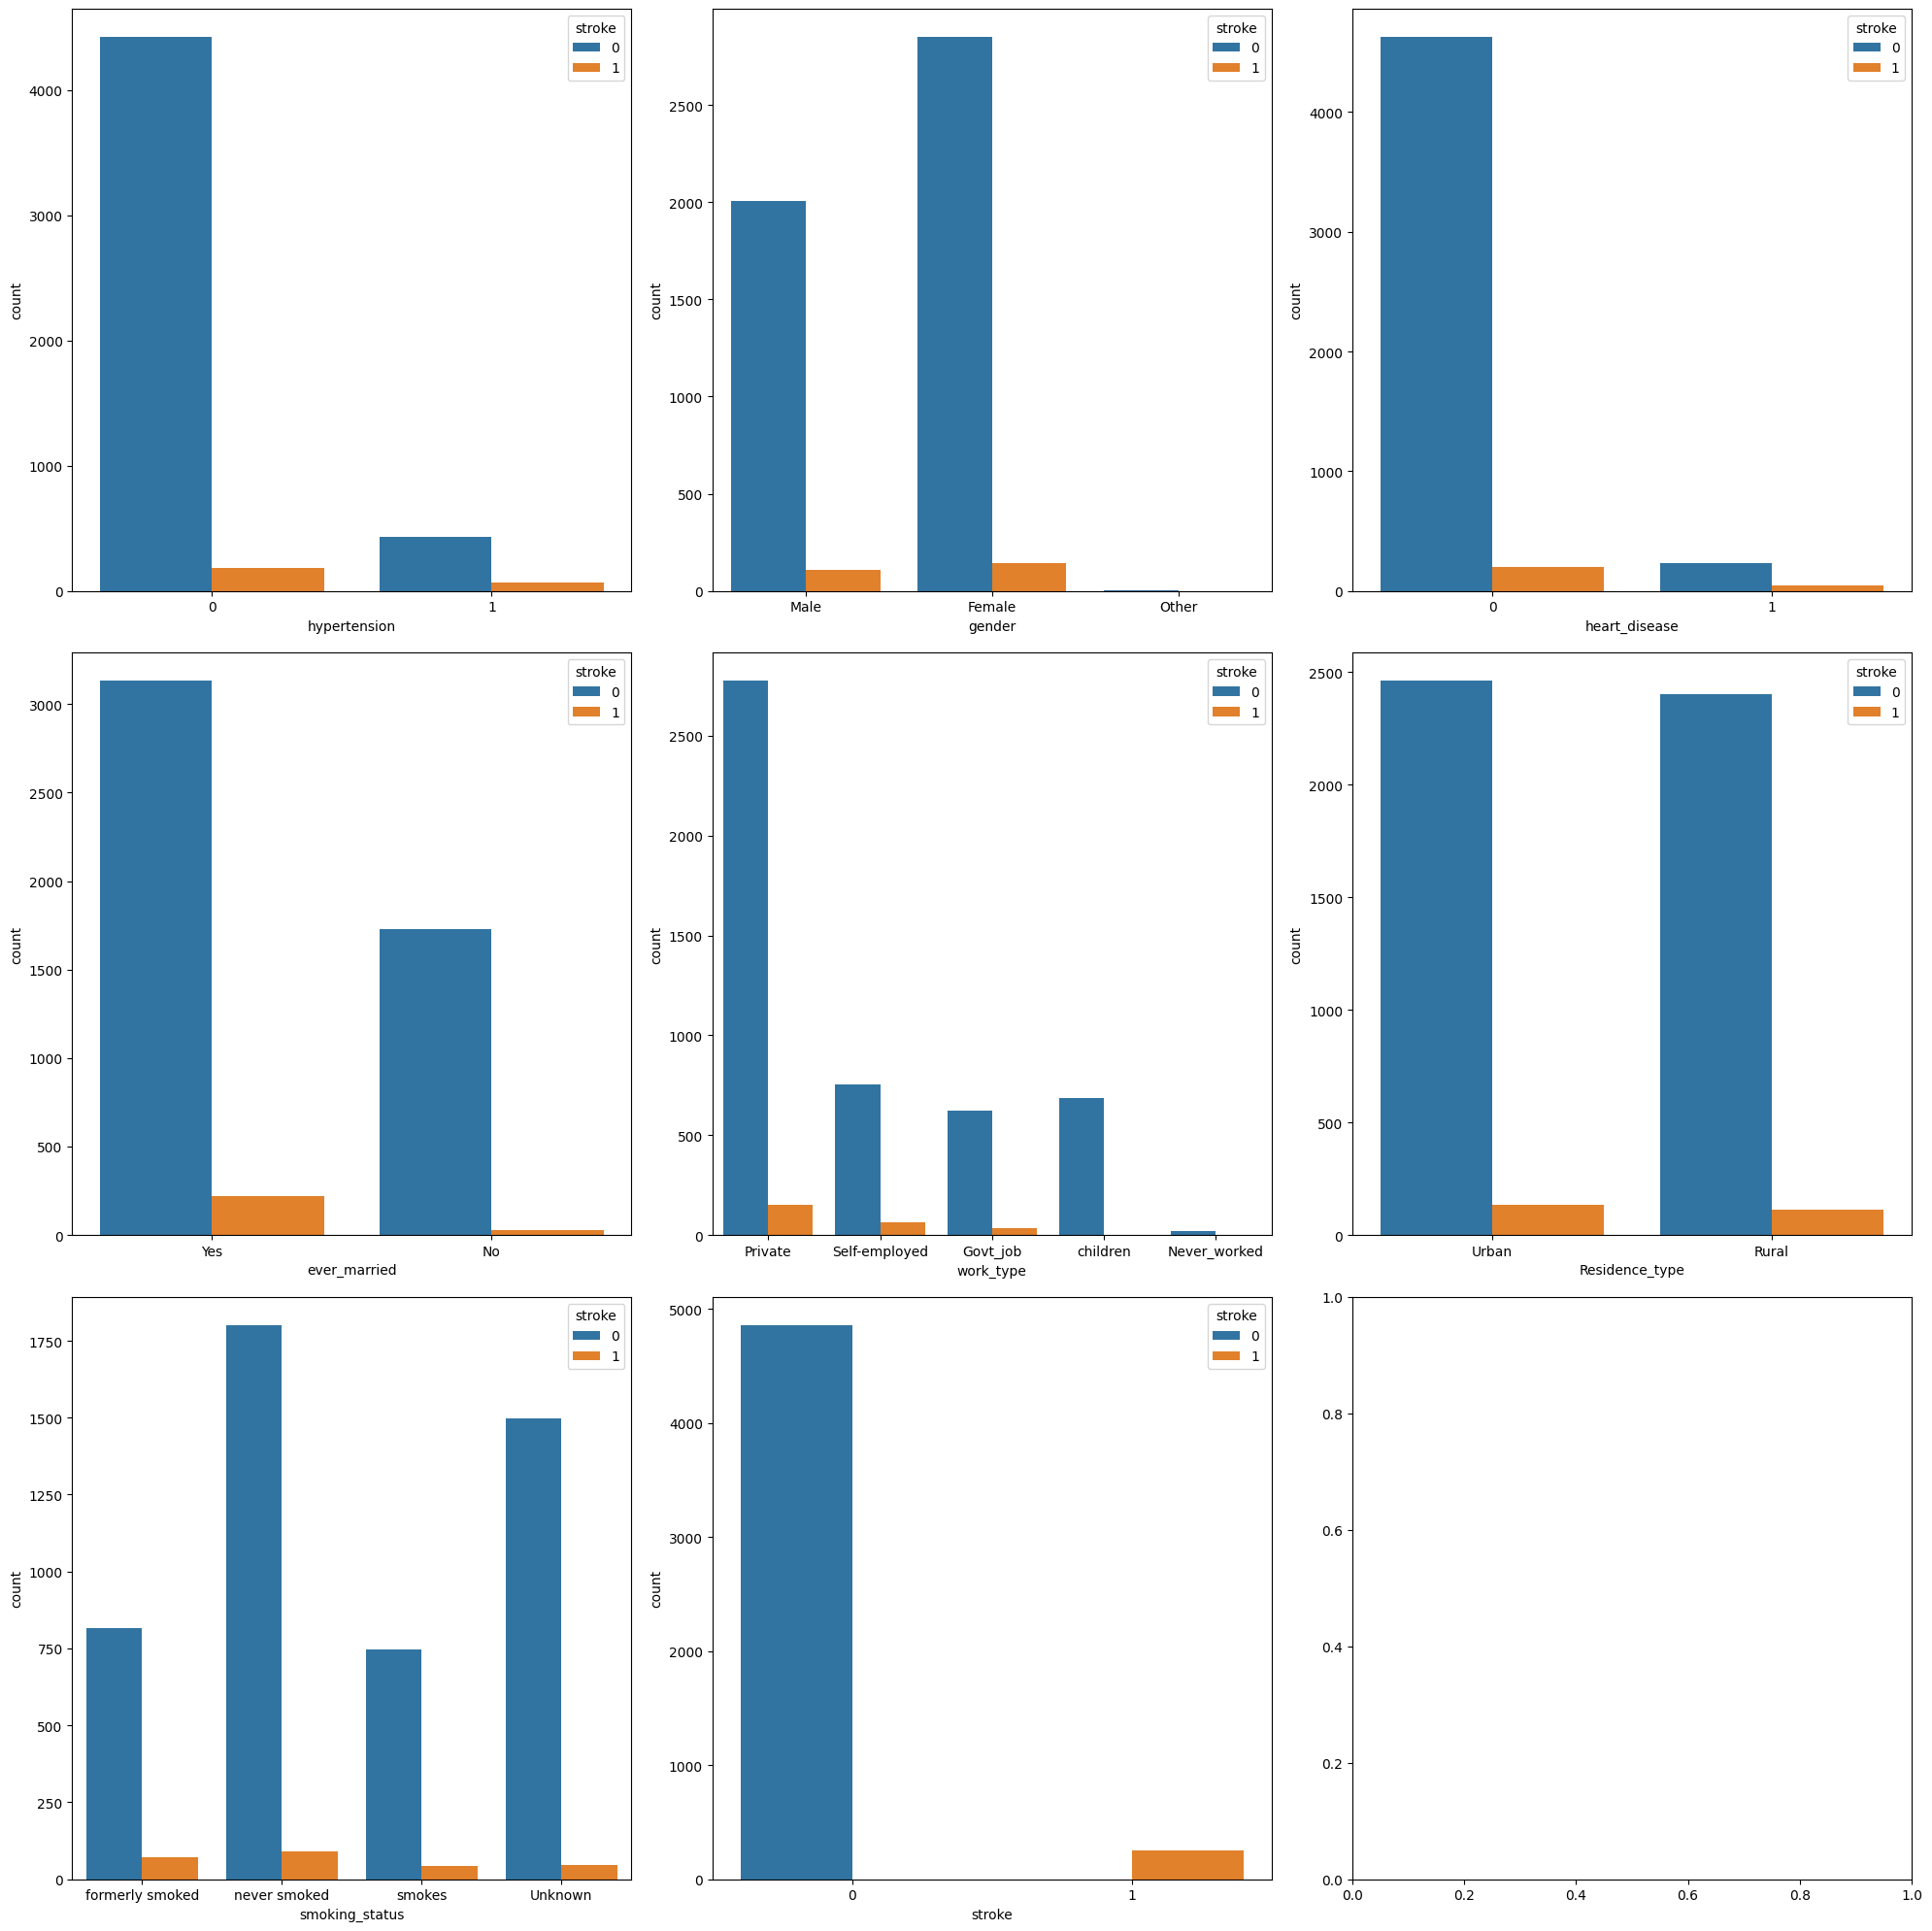

In [20]:
# Plot the categorical variables against the target variable 'stroke'
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for var, subplot in zip(cat_data, axs.flatten()):
    sns.countplot(x=df[var], hue=df['stroke'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

plt.tight_layout()
plt.show()

In [22]:
df1=df.drop(labels=['gender','ever_married','Residence_type','smoking_status','work_type'],axis=1)

<Axes: >

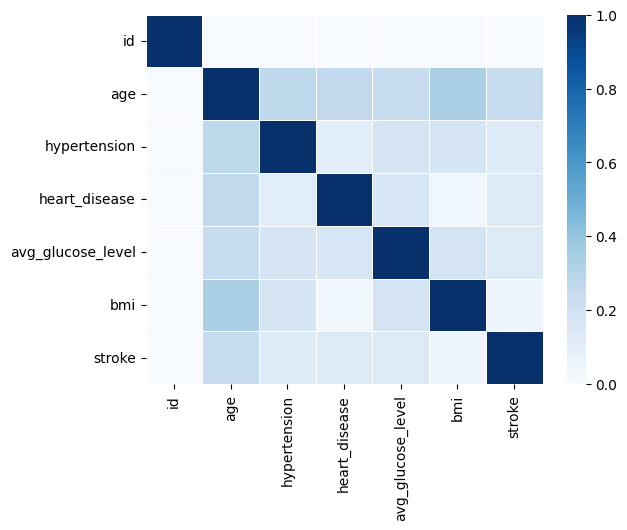

In [25]:
sns.heatmap(df1.corr(), annot=False, cmap='Blues', linewidths=0.5)

 The heatmap provides a visualization of the correlation between all pairs of numerical features in the dataset. The color of each cell represents the correlation coefficient between the pair of variables. The darker the color, the stronger the correlation.

### Interpretation of Results:

Observations from the **bivariate analysis** with the **categorical variables**:

- **gender**: Both `males` and `females` have a similar proportion of stroke cases, with males having slightly more. The `Other` category has no stroke cases, but this could be due to the very small sample size for this category.

- **hypertension**: Patients with `hypertension` have a **higher** proportion of stroke cases than those without hypertension.

- **heart_disease**: Patients with `heart disease` also have a **higher** proportion of stroke cases than those without heart disease.

- **ever_married**: Those who have been ``married`` have a **higher** proportion of stroke cases than those who have not.

- **work_type**: Patients who are `self-employed` or work in `private jobs` have a **higher proportion** of stroke cases compared to other work types.

- **Residence_type**: The proportion of stroke cases is almost **equal** for both `urban` and `rural` residents.

- **smoking_status**: The proportion of stroke cases is **higher** for patients who `formerly smoked` or `currently smoke` compared to those who never smoked. The stroke proportion for the 'Unknown' category is lower.

### The data cleansing process should include the following steps:

1. **Check for and handle missing values**: Columns such as 'bmi' had missing values that is filled with median values after checking outliers of 'bmi'.

2. **Check for and handle duplicates:** We need to ensure that there are no duplicated rows in the dataset.

3. **Check for and handle outliers:** Some columns, such as 'avg_glucose_level' and 'bmi', are numerical and may contain outliers that could distort the analysis. We should decide on a method to handle these, such as removing them or applying a transformation to reduce their impact.

4. **Convert categorical variables to appropriate data type:** Columns like 'gender', 'ever_married', 'work_type', 'Residence_type', and 'smoking_status' are categorical. Depending on the analysis, we may need to convert these to dummy variables.

5. **Check for and handle incorrect values:** For example, 'age' should not be negative, 'hypertension' and 'heart_disease' should be 0 or 1, 'gender' should be 'Male' or 'Female', etc.


### Removing duplicate values

In [27]:
# Remove ID Rows
data = df.drop('id',axis=1)

# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

num_duplicate_rows

0

### outlier treatment

* We'll check for outliers in the `age`, `avg_glucose_level`, and `bmi` columns. We won't check `hypertension`, `heart_disease`, and `stroke` columns as they are binary.

In [28]:
# Define a function to calculate the number of outliers using the IQR method
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return ((column < lower_bound) | (column > upper_bound)).sum()

# Check for outliers in 'age', 'avg_glucose_level', and 'bmi'
outliers = {column: count_outliers(data[column]) for column in ['age', 'avg_glucose_level','bmi']}

outliers

{'age': 0, 'avg_glucose_level': 627, 'bmi': 110}

### log transformation

In [29]:
# Apply log transformation
data['avg_glucose_level'] = np.log(data['avg_glucose_level'])
data['bmi'] = np.log(data['bmi'])

# Check for outliers in 'avg_glucose_level' after transformation
outliers_transformed = {column: count_outliers(data[column]) for column in ['avg_glucose_level','bmi']}

print(outliers_transformed)

{'avg_glucose_level': 380, 'bmi': 48}


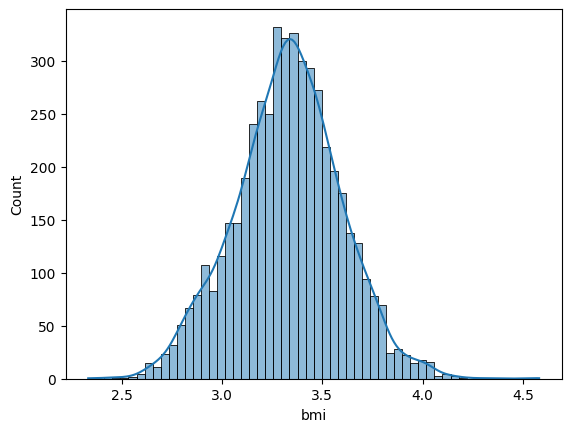

In [30]:
sns.histplot(x=data['bmi'],data=df,kde=True)
plt.show()

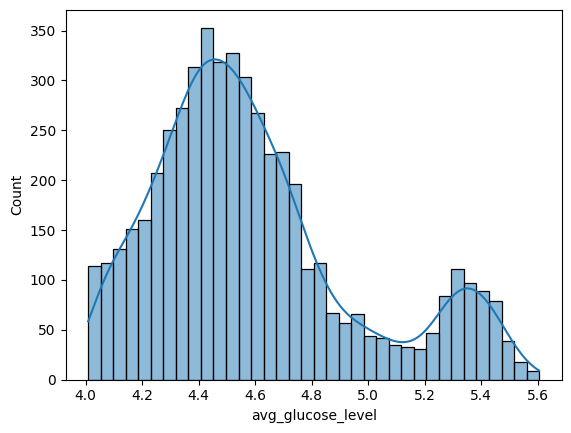

In [31]:
sns.histplot(x=data['avg_glucose_level'],data=df,kde=True)
plt.show()

The **log transformation** has reduced the number of outliers in the `avg_glucose_level` and `bmi` columns. The `avg_glucose_level` column now has **380** outliers (down from 627) and The `bmi` column now has **110** outliers (down from 48)

In [32]:
# Check unique values in categorical columns
unique_values_categorical = {column: data[column].unique() for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']}

In [33]:
unique_values_categorical

{'gender': array(['Male', 'Female', 'Other'], dtype=object),
 'ever_married': array(['Yes', 'No'], dtype=object),
 'work_type': array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
       dtype=object),
 'Residence_type': array(['Urban', 'Rural'], dtype=object),
 'smoking_status': array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
       dtype=object)}

In [34]:
# Count the number of 'Other' instances in 'gender' and 'Unknown' instances in 'smoking_status'
other_gender_count = (data['gender'] == 'Other').sum()
unknown_smoking_status_count = (data['smoking_status'] == 'Unknown').sum()

other_gender_count, unknown_smoking_status_count

(1, 1544)

In [35]:
# Drop the row with 'Other' for 'gender'
data = data[data['gender'] != 'Other']
##For the Unknown category in smoking_status, since we have a relatively large number of instances (1544) 
##we could treat Unknown as a separate category.

### conversion of categorical variable into numerical

In [36]:
# Convert categorical variables to numerical format using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [37]:
data_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,5.432367,3.600048,1,False,True,False,True,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,5.309307,NaN,1,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,4.662684,3.481240,1,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,5.143008,3.538057,1,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,5.159745,3.178054,1,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,4.427836,NaN,0,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
5106,81.0,0,0,4.829912,3.688879,0,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False
5107,35.0,0,0,4.418720,3.421000,0,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
5108,51.0,0,0,5.113733,3.242592,0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False


In [38]:
## model creation

In [39]:
# Apply the data cleansing process prior
data_encoded['bmi'].fillna(data_encoded['bmi'].median(), inplace=True)



In [40]:
data_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,5.432367,3.600048,1,False,True,False,True,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,5.309307,3.335770,1,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,4.662684,3.481240,1,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,5.143008,3.538057,1,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,5.159745,3.178054,1,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,4.427836,3.335770,0,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
5106,81.0,0,0,4.829912,3.688879,0,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False
5107,35.0,0,0,4.418720,3.421000,0,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
5108,51.0,0,0,5.113733,3.242592,0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False


In [41]:
x=data_encoded.drop(columns='stroke') ## dependent feature
y=data_encoded['stroke'] ## independent feature

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [44]:
print(model.feature_importances_)

[2.29857527e-01 2.93664629e-02 2.19832918e-02 2.27119242e-01
 1.92940356e-01 2.73838748e-02 2.77112694e-02 1.18523440e-02
 1.17015157e-02 1.69532638e-02 0.00000000e+00 2.16949259e-02
 1.94764435e-02 1.54955832e-04 3.47203718e-02 3.10862305e-02
 2.29562661e-02 2.57188952e-02 2.43182334e-02 2.30045299e-02]


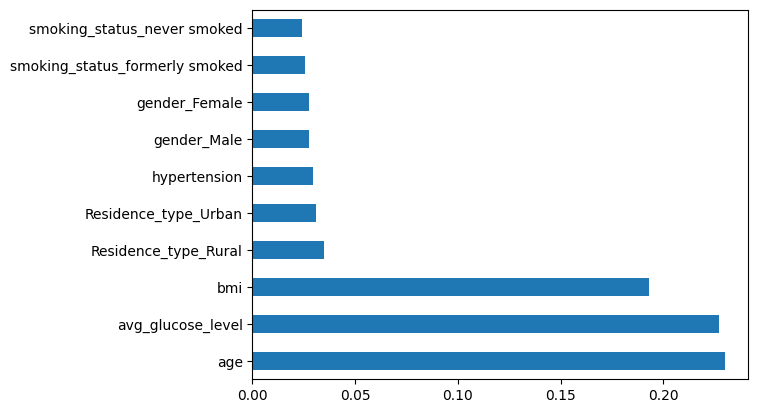

In [45]:
feature_importance=pd.Series(model.feature_importances_,index=x.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [48]:
sm=SMOTE(random_state=42)

In [49]:
X_train,y_train=sm.fit_resample(X_train,y_train)

In [50]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (7800, 20)
After OverSampling, the shape of train_y: (7800,) 



In [51]:
param_grid = {
   'Model__max_depth': [3, 5, 7],
    'Model__learning_rate': [0.01, 0.1, 0.2],
    'Model__n_estimators': [100, 200, 500],
    'Model__gamma': [0, 0.1, 0.2]}



# Define the scoring function
scoring = make_scorer(roc_auc_score)

# Perform hyperparameter grid search
grid_search = GridSearchCV(estimator= XGBClassifier(), param_grid=param_grid, scoring=scoring, cv=3, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[21:26:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "Model__gamma", "Model__learning_rate", "Model__max_depth", "Model__n_estimators" } are not used.

[CV] END Model__gamma=0, Model__learning_rate=0.01, Model__max_depth=3, Model__n_estimators=100; total time=   0.3s
[21:26:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "Model__gamma", "Model__learning_rate", "Model__max_depth", "Model__n_estimators" } are not used.

[CV] END Model__gamma=0, Model__learning_rate=0.01, Model__max_depth=3, Model__n_estimators=100; total time=   0.1s
[21:26:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: 

{'Model__gamma': 0,
 'Model__learning_rate': 0.01,
 'Model__max_depth': 3,
 'Model__n_estimators': 100}

In [52]:


# Define the model with the optimal hyperparameters
model = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    n_estimators=100,
    subsample=0.7,
    scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
    eval_metric='logloss', # use logloss to evaluate performance
    use_label_encoder=False # to avoid warning message
)

# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

In [53]:
X_test.shape

(1022, 20)

In [55]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [56]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.16      0.79      0.27        62

    accuracy                           0.74      1022
   macro avg       0.57      0.76      0.56      1022
weighted avg       0.93      0.74      0.81      1022



### Intepret the Results

The results from the classification report are promising, but there is definitely room for improvement.

- **Precision** measures the accuracy of positive predictions. The model has a high precision (0.98) for predicting no stroke, meaning that when the model predicts that a patient will not have a stroke, it is correct 98% of the time. However, the precision is much lower for predicting stroke (0.16), meaning that when the model predicts a stroke, it is correct only 11% of the time.

- **Recall** (also known as sensitivity or true positive rate) measures the fraction of positives that were correctly identified. The model has a recall of 0.74 for no stroke and 0.79 for stroke. This means that the model correctly identifies 74% of the patients who will not have a stroke and 79% of the patients who will have a stroke.

- The **F1 score** is a weighted average of precision and recall. The F1 scores for no stroke and stroke are 0.84 and 0.27, respectively. The low F1 score for stroke indicates that the model's performance is poor when it comes to predicting stroke.

- The **accuracy** of the model is 0.74, which means that the model correctly predicts whether a patient will have a stroke or not in 74% of the cases. However, accuracy can be misleading when dealing with imbalanced classes, as it is in this case.

<b>Recommendation: </b>
It's recommended to further fine-tune the model, possibly by exploring different algorithms, oversampling the minority class, and/or engineering new features. The focus should be on improving the recall for the 'Stroke' class without significantly compromising the precision.

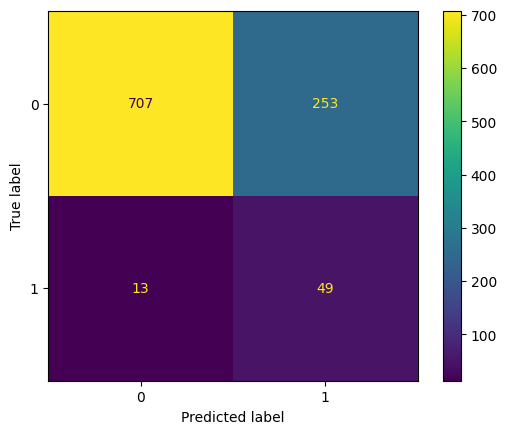

In [57]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

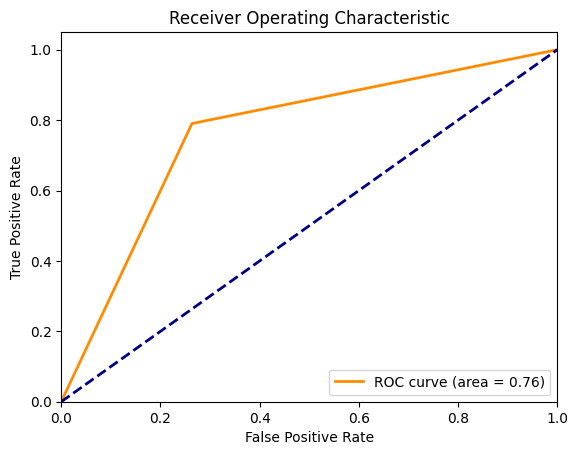

In [58]:
# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [59]:
import pickle
f=open("healthcare_dataset.pkl","wb")
pickle.dump(model,f)
f.close()